In [2]:
!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

    extract-msg (<=0.29.*)
                 ~~~~~~~^

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Reading the File 
df=pd.read_csv("D:\Programmes\Python\DataSets\Coffee Shop Sales.csv")

In [4]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01-01-2023,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01-01-2023,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01-01-2023,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01-01-2023,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01-01-2023,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,30-06-2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,30-06-2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,30-06-2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,30-06-2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [5]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [6]:
df.drop(['transaction_id', 'transaction_date', 'store_id','transaction_time', 'product_id', 'product_detail'],axis=1,inplace=True)
# df.drop(columns=['column 1','columns2'],inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_qty   149116 non-null  int64  
 1   store_location    149116 non-null  object 
 2   unit_price        149116 non-null  float64
 3   product_category  149116 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [8]:
df.describe()

,transaction_qty,unit_price
count,149116.000000,149116.000000
mean,1.438276,3.382219
std,0.542509,2.658723
min,1.000000,0.800000
25%,1.000000,2.500000
50%,1.000000,3.000000
75%,2.000000,3.750000
max,8.000000,45.000000


In [9]:
df.duplicated().sum()

148879

In [10]:

df.drop_duplicates()

,transaction_qty,store_location,unit_price,product_category
0,2,Lower Manhattan,3.00,Coffee
1,2,Lower Manhattan,3.10,Tea
2,2,Lower Manhattan,4.50,Drinking Chocolate
3,1,Lower Manhattan,2.00,Coffee
5,1,Lower Manhattan,3.00,Bakery
...,...,...,...,...
21607,1,Astoria,6.40,Packaged Chocolate
38661,2,Astoria,3.00,Bakery
39176,6,Lower Manhattan,12.00,Branded
61896,2,Lower Manhattan,12.00,Branded


In [11]:
#creating new column (Amount)

df['amount']=df['unit_price']*df['transaction_qty']
# df[['unit_price','amount']].describe()

In [12]:
#displaying first 5 values in file
df.head()

,transaction_qty,store_location,unit_price,product_category,amount
0,2,Lower Manhattan,3.0,Coffee,6.0
1,2,Lower Manhattan,3.1,Tea,6.2
2,2,Lower Manhattan,4.5,Drinking Chocolate,9.0
3,1,Lower Manhattan,2.0,Coffee,2.0
4,2,Lower Manhattan,3.1,Tea,6.2


In [13]:
df.tail()

,transaction_qty,store_location,unit_price,product_category,amount
149111,2,Hell's Kitchen,2.50,Tea,5.00
149112,2,Hell's Kitchen,3.00,Tea,6.00
149113,1,Hell's Kitchen,3.00,Tea,3.00
149114,1,Hell's Kitchen,3.75,Coffee,3.75
149115,2,Hell's Kitchen,0.80,Flavours,1.60


In [14]:
#total amount and quantity

total_amount=df['amount'].sum()
total_qty=df['transaction_qty'].sum()

print(f'Total Amount : {round(total_amount,2)}')
print(f'Total Quantity : {total_qty}')
              #or
print("total amount ",total_amount)
print("total quantities sold : ",total_qty)


Total Amount : 698812.33
Total Quantity : 214470
total amount  698812.3300000002
total quantities sold :  214470


In [15]:
stores=df['store_location'].value_counts().reset_index()
stores

,store_location,count
0,Hell's Kitchen,50735
1,Astoria,50599
2,Lower Manhattan,47782


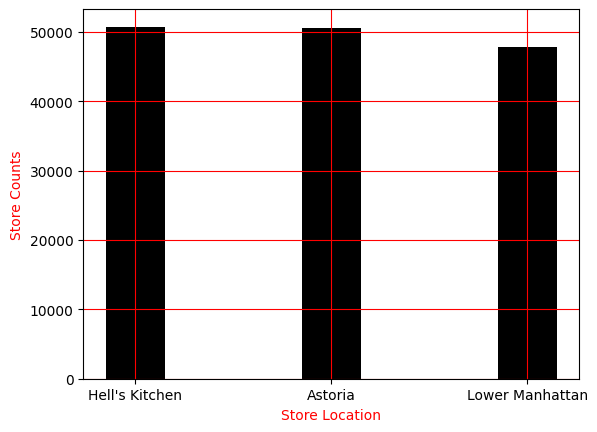

In [16]:
# plt.figure(figsize=(4,3))   syntax-plt.bar(x axis,y axis,other attributes)
plt.bar(stores['store_location'],stores['count'],color='black',width=0.3)
plt.xlabel('Store Location',color='red')
plt.ylabel('Store Counts',color='red')
plt.grid(color='red')
plt.show()

In [17]:
store_amount=df.groupby(['store_location'])[['amount']].sum().reset_index()    #Total Amount Earned
store_amount

,store_location,amount
0,Astoria,232243.91
1,Hell's Kitchen,236511.17
2,Lower Manhattan,230057.25


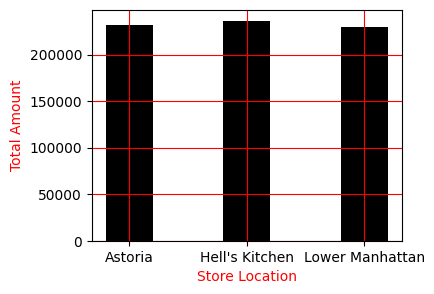

In [18]:
plt.figure(figsize=(4,3))
plt.bar(store_amount['store_location'],store_amount['amount'],color='black',width=0.4)
plt.xlabel('Store Location',color='red')
plt.ylabel('Total Amount',color='red')
plt.grid(color='red')
plt.show()

In [19]:
#total Amount by each category of product
amountByProduct=df.groupby('product_category')[['amount']].sum().reset_index()
amountByProduct

,product_category,amount
0,Bakery,82315.64
1,Branded,13607.00
2,Coffee,269952.45
3,Coffee beans,40085.25
4,Drinking Chocolate,72416.00
5,Flavours,8408.80
6,Loose Tea,11213.60
7,Packaged Chocolate,4407.64
8,Tea,196405.95


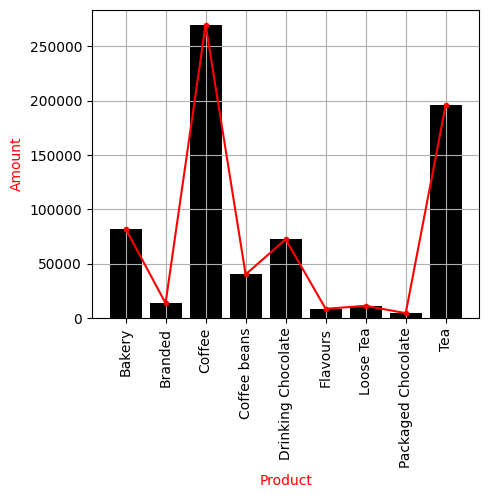

In [20]:
plt.figure(figsize=(5,4))
plt.bar(amountByProduct['product_category'],amountByProduct['amount'],color='black')
plt.plot(amountByProduct['amount'],color='red',marker='.')
plt.xticks(rotation=90)
plt.xlabel('Product',color='red')
plt.ylabel('Amount',color='red')
plt.grid()
plt.show()

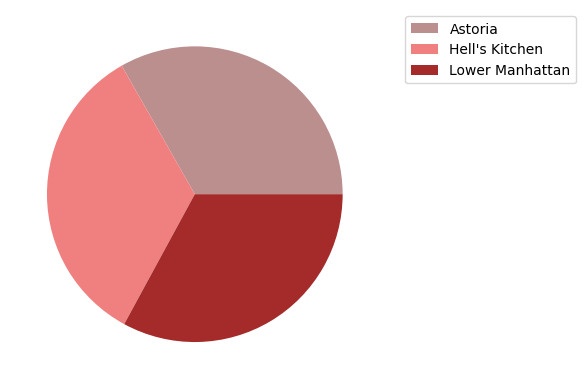

In [21]:
plt.pie(store_amount['amount'],colors=['rosybrown','lightcoral','brown'])
plt.legend(bbox_to_anchor=(1.05,1.0),labels=store_amount['store_location'])
plt.show()

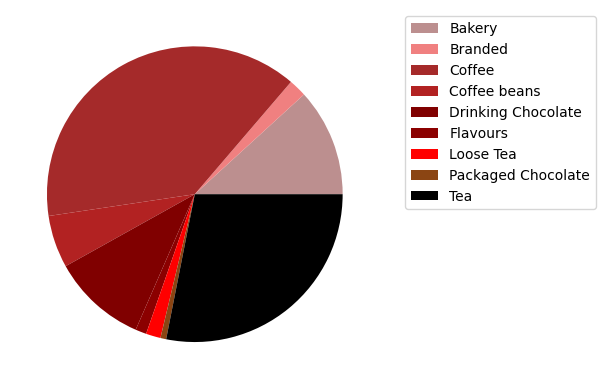

In [22]:
plt.pie(amountByProduct['amount'],colors=['rosybrown','lightcoral','brown','firebrick','maroon','darkred','red','saddlebrown','black'])
plt.legend(bbox_to_anchor=(1.05,1.0),labels=amountByProduct['product_category'])
plt.show()

In [23]:
#Store in Location : 'Astoria'

data1=df.where(df['store_location']=='Astoria')
data1.dropna(inplace=True)

In [24]:
#amount and quantity by product category at Astoria
amountByProduct=data1.groupby('product_category')[['transaction_qty','amount']].sum().reset_index()
amountByProduct

,product_category,transaction_qty,amount
0,Bakery,7496.0,26599.75
1,Branded,279.0,5457.00
2,Coffee,29655.0,89744.30
3,Coffee beans,502.0,10219.20
4,Drinking Chocolate,6351.0,26335.25
5,Flavours,2206.0,1764.80
6,Loose Tea,344.0,3194.00
7,Packaged Chocolate,110.0,1089.71
8,Tea,24048.0,67839.90


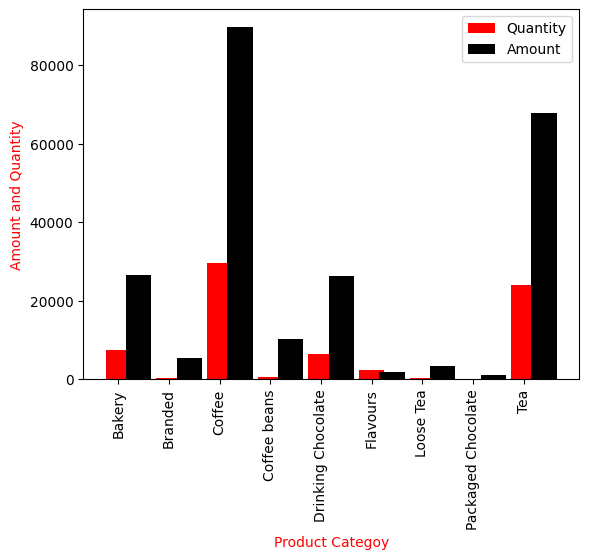

In [25]:
c=np.arange(len(amountByProduct['product_category']))
plt.xticks(c,amountByProduct['product_category'],rotation=90)
plt.bar(c,amountByProduct['transaction_qty'],width=0.5,label='Quantity',color='red')
plt.bar(c+0.4,amountByProduct['amount'],width=0.5,label='Amount',color='black')
plt.xlabel('Product Categoy',color='red')
plt.ylabel('Amount and Quantity',color='red')
plt.legend()
plt.show()

In [26]:
#Stores in Location : 'Hell's kitchen'
data2=df.where(df['store_location']=="Hell's Kitchen")
data2.dropna(inplace=True)

In [27]:
#amount and quantity by product category at Hell's Kitchen
amountByProduct=data2.groupby('product_category')[['transaction_qty','amount']].sum().reset_index()
amountByProduct

,product_category,transaction_qty,amount
0,Bakery,7678.0,27386.95
1,Branded,119.0,1942.00
2,Coffee,30220.0,91222.65
3,Coffee beans,790.0,18635.10
4,Drinking Chocolate,5672.0,23586.25
5,Flavours,3596.0,2876.80
6,Loose Tea,485.0,4461.35
7,Packaged Chocolate,197.0,1698.77
8,Tea,22980.0,64701.30


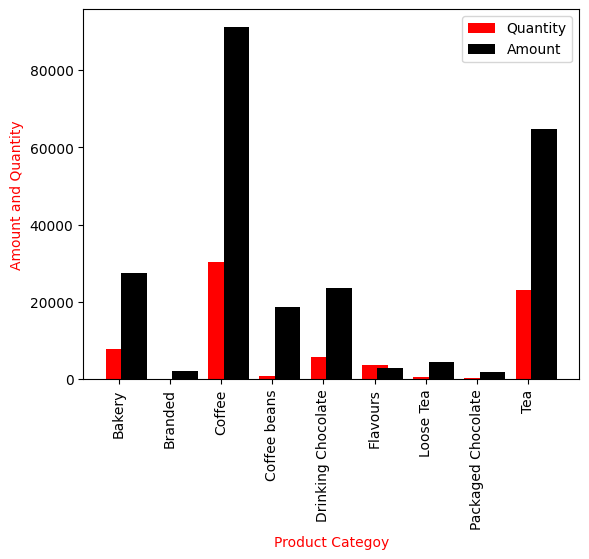

In [28]:
c=np.arange(len(amountByProduct['product_category']))
plt.xticks(c,amountByProduct['product_category'],rotation=90)
plt.bar(c,amountByProduct['transaction_qty'],width=0.5,label='Quantity',color='red')
plt.bar(c+0.3,amountByProduct['amount'],width=0.5,label='Amount',color='black')
plt.xlabel('Product Categoy',color='red')
plt.ylabel('Amount and Quantity',color='red')
plt.legend()
plt.show()

In [29]:
#Stores in Location : 'Lower Manhattan'
data3=df.where(df['store_location']=="Lower Manhattan")
data3.dropna(inplace=True)

In [30]:
#amount and quantity by product category at Lower Manhattan
amountByProduct=data3.groupby('product_category')[['transaction_qty','amount']].sum().reset_index()
amountByProduct

,product_category,transaction_qty,amount
0,Bakery,8040.0,28328.94
1,Branded,378.0,6208.00
2,Coffee,29375.0,88985.50
3,Coffee beans,536.0,11230.95
4,Drinking Chocolate,5434.0,22494.50
5,Flavours,4709.0,3767.20
6,Loose Tea,381.0,3558.25
7,Packaged Chocolate,180.0,1619.16
8,Tea,22709.0,63864.75


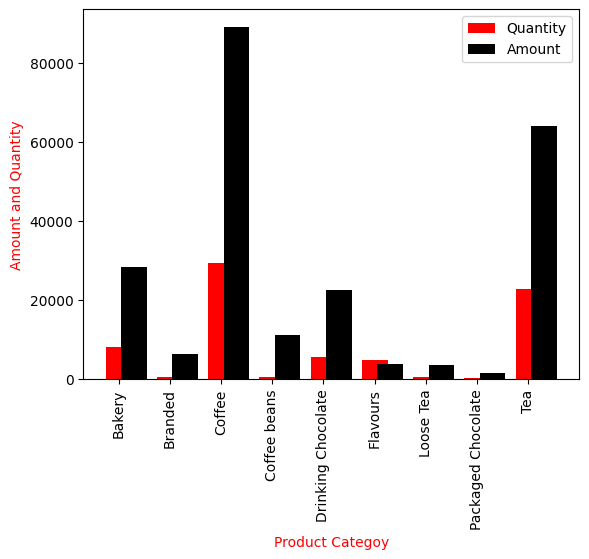

In [31]:
c=np.arange(len(amountByProduct['product_category']))
plt.xticks(c,amountByProduct['product_category'],rotation=90)
plt.bar(c,amountByProduct['transaction_qty'],width=0.5,label='Quantity',color='red')
plt.bar(c+0.3,amountByProduct['amount'],width=0.5,label='Amount',color='black')
plt.xlabel('Product Categoy',color='red')
plt.ylabel('Amount and Quantity',color='red')
plt.legend()
plt.show()

# Insights from EDA
1. Total Amount Earned is 6,98,812
2. Total Quantity Sold is 2,14,470
3. Highest Amount is earned through location Hell's Kitchen and amount earned is Rs.2,36,511
4. Highly sold product is coffee and earned Rs.2,69,952
5. Least Sold product is packaged chocolate and earned Rs.4,407

# Location : Astoria
1. Highly Sold Product is Coffee and earned amount is Rs.89,744.30
2. Least sold product is packaged chocolate and earned amoount is Rs.1,089.71

# Location : Hell's Kitchen
1. Highly Sold Product is Coffee and earned amount is Rs.91,222.65
2. Least sold product is packaged chocolate and earned amoount is Rs.1,698.77

# Location : Lower Manhattan
1. Highly Sold Product is Coffee and earned amount is Rs.88,985.50
2. Least sold product is packaged chocolate and earned amoount is Rs.1,619.16